# Recurrent Neural Network - RNN

## Creating Recurrent Neural Network

In [ ]:
from keras.layers import SimpleRNN
import numpy as np

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding

### An RNN layer

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


### Dimensioned RNN layer

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
Total params: 34,080
Trainable params: 34,080
Non-trainable params: 0
_________________________________________________________________


### Consecutive RNN layers

In [ ]:
model = Sequential()
model.add(Embedding(1000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, None, 32)          2080      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 32)                2080      
                                                                 
Total params: 40,320
Trainable params: 40,320
Non-trainable params: 0
_________________________________________________________________


## Preparing the IMDB Dataset
* IMDB: Internet Movie Database 

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.utils import pad_sequences

In [ ]:
num_features = 1000
maxlen = 500
batch_size = 32

In [ ]:
# load data
print('Load data..')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = num_features)



print(len(input_train), 'Education sequence', input_train.shape)
print(len(input_test), 'Test sequence', input_test.shape)

Load data..
17464789/17464789 [==============================] - 0s 0us/step
25000 Education sequence (25000,)
25000 Test sequence (25000,)


In [ ]:
print('Pad sequnce (sample x train)')

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test =  pad_sequences(input_test, maxlen=maxlen)


print(len(input_train), 'Education sequence', input_train.shape)
print(len(input_test), 'Test sequence', input_test.shape)

Pad sequnce (sample x train)
25000 Education sequence (25000, 500)
25000 Test sequence (25000, 500)


### Training the EMBEDDING and SimpleRNN Layers

In [ ]:
from keras.layers import Dense
from keras import layers

### Modeling with Simple RNN

In [ ]:
model = Sequential()
model.add(Embedding(num_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          32000     
                                                                 
 simple_rnn_6 (SimpleRNN)    (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 34,113
Trainable params: 34,113
Non-trainable params: 0
_________________________________________________________________


### Modeling with Simple LSTM

In [ ]:
model = Sequential()
model.add(layers.Embedding(num_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          32000     
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 48,705
Trainable params: 48,705
Non-trainable params: 0
_________________________________________________________________


### Compiling the model - RNN

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 22s 62ms/step - loss: 0.6382 - acc: 0.6230 - val_loss: 0.5093 - val_acc: 0.7848
Epoch 2/10
157/157 [==============================] - 6s 41ms/step - loss: 0.4670 - acc: 0.7939 - val_loss: 0.4221 - val_acc: 0.8174
Epoch 3/10
157/157 [==============================] - 5s 33ms/step - loss: 0.3912 - acc: 0.8331 - val_loss: 0.4046 - val_acc: 0.8332
Epoch 4/10
157/157 [==============================] - 5s 32ms/step - loss: 0.3600 - acc: 0.8478 - val_loss: 0.4052 - val_acc: 0.8246
Epoch 5/10
157/157 [==============================] - 6s 35ms/step - loss: 0.3430 - acc: 0.8571 - val_loss: 0.3764 - val_acc: 0.8362
Epoch 6/10
157/157 [==============================] - 5s 33ms/step - loss: 0.3342 - acc: 0.8620 - val_loss: 0.4359 - val_acc: 0.7978
Epoch 7/10
157/157 [==============================] - 5s 34ms/step - loss: 0.3243 - acc: 0.8641 - val_loss: 0.3777 - val_acc: 0.8500
Epoch 8/10
157/157 [==============================] - 5s 32ms/step -

### Compiling the model - LSTM

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 13s 57ms/step - loss: 0.3049 - acc: 0.8751 - val_loss: 0.3452 - val_acc: 0.8532
Epoch 2/10
157/157 [==============================] - 5s 33ms/step - loss: 0.2994 - acc: 0.8781 - val_loss: 0.3402 - val_acc: 0.8582
Epoch 3/10
157/157 [==============================] - 5s 32ms/step - loss: 0.2929 - acc: 0.8796 - val_loss: 0.3428 - val_acc: 0.8532
Epoch 4/10
157/157 [==============================] - 6s 36ms/step - loss: 0.2883 - acc: 0.8821 - val_loss: 0.3448 - val_acc: 0.8570
Epoch 5/10
157/157 [==============================] - 5s 31ms/step - loss: 0.2843 - acc: 0.8839 - val_loss: 0.3417 - val_acc: 0.8538
Epoch 6/10
157/157 [==============================] - 5s 34ms/step - loss: 0.2836 - acc: 0.8839 - val_loss: 0.3623 - val_acc: 0.8504
Epoch 7/10
157/157 [==============================] - 5s 32ms/step - loss: 0.2786 - acc: 0.8882 - val_loss: 0.3543 - val_acc: 0.8470
Epoch 8/10
157/157 [==============================] - 5s 35ms/step -

### Plotting Results

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

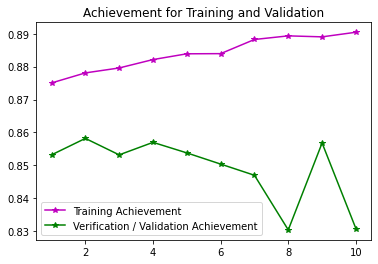

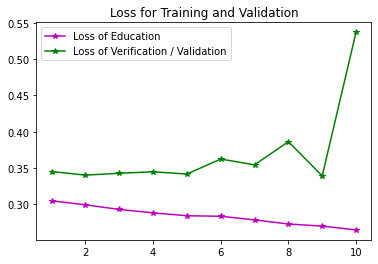

In [ ]:
plt.plot(epochs, acc, 'm*-', label= 'Training Achievement')
plt.plot(epochs, val_acc, 'g*-', label= 'Verification / Validation Achievement')
plt.title('Achievement for Training and Validation')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Loss of Education')
plt.plot(epochs, val_loss, 'g*-', label= 'Loss of Verification / Validation')
plt.title('Loss for Training and Validation')
plt. legend()

plt.show()

In [ ]:
print(acc, 'training achievements')

[0.8750500082969666, 0.8780999779701233, 0.8795999884605408, 0.8821499943733215, 0.883899986743927, 0.8839499950408936, 0.8882499933242798, 0.8893499970436096, 0.8890500068664551, 0.8904500007629395] training achievements


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs = range(1, len(acc) + 1)

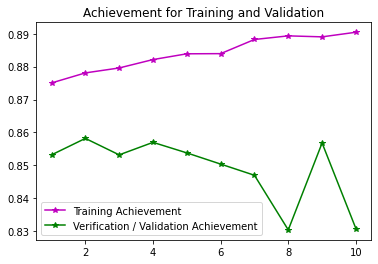

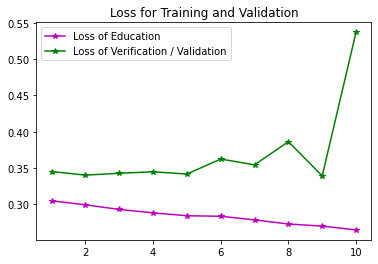

In [ ]:
plt.plot(epochs, acc, 'm*-', label= 'Training Achievement')
plt.plot(epochs, val_acc, 'g*-', label= 'Verification / Validation Achievement')
plt.title('Achievement for Training and Validation')
plt. legend()

plt.figure()

plt.plot(epochs, loss, 'm*-', label= 'Loss of Education')
plt.plot(epochs, val_loss, 'g*-', label= 'Loss of Verification / Validation')
plt.title('Loss for Training and Validation')
plt. legend()

plt.show()